# **Retinopathy Diabetic** 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%cd /content/drive/MyDrive/datamining/tugas/

/content/drive/MyDrive/datamining/tugas


In [ ]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [ ]:
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

In [ ]:
data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])

In [ ]:
df.columns = [col_names]
df

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


In [ ]:
X = df.drop(columns=['label'])
X

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0


## **Prepocessing**



### **Normalisasi Min-Max**

$$ X'= \frac{x-x_{min}}{x_{max}-x_{min}}$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import joblib
scaler = MinMaxScaler()
#scaler.transform(features)
scaled = scaler.fit_transform(X)
#memasukan fitur 
features_names = X.columns.copy()
#features_names.remove('label')
scaled_features = pd.DataFrame(scaled, columns=features_names)
scaled_features.head(10)
scaler_filename = "scaled.save"
joblib.dump(scaler, scaler_filename) 
scaler = joblib.load(scaler_filename)

In [ ]:
scaled_features

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,0.220000,0.251908,0.277311,0.307692,0.312500,0.261364,0.014179,0.005609,0.000294,0.000052,0.000000,0.000000,0.000000,0.000000,0.756089,0.365106,0.0
1147,1.0,1.0,0.320000,0.366412,0.403361,0.461538,0.458333,0.409091,0.155722,0.163809,0.076060,0.016390,0.000030,0.000000,0.000000,0.000000,0.663701,0.410954,0.0
1148,1.0,0.0,0.320000,0.358779,0.394958,0.423077,0.437500,0.363636,0.074612,0.083569,0.016624,0.002307,0.000218,0.000000,0.000000,0.000000,0.859281,0.446002,0.0
1149,1.0,1.0,0.253333,0.267176,0.235294,0.211538,0.125000,0.068182,0.099548,0.075419,0.044696,0.018030,0.010958,0.016263,0.040346,0.056559,0.526653,0.302456,1.0


### **Save Model Prepocessing**

In [ ]:
filename = "normalisasi.sav"
joblib.dump(scaler, filename) 

['normalisasi.sav']

### **Encoding Label**

In [ ]:
y = df['label'].values
y[0:5]

array([[b'0'],
       [b'0'],
       [b'1'],
       [b'0'],
       [b'1']], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [ ]:
yBaru = le.transform(y)

In [ ]:
yBaru

array([0, 0, 1, ..., 0, 1, 0])

### **Split Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(scaled_features,test_size=0.2, random_state=1)
training_label, test_label = train_test_split(yBaru, test_size=0.2, random_state=1)

## **Model**

### **Naive Bayes Gaussian**

In [ ]:
#Model Select
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(training, training_label)

probas = gaussian.predict_proba(test)
probas = probas[:,1]
probas.shape

(231,)

In [ ]:
training.shape

(920, 19)

In [ ]:
probas

array([0.99184108, 0.01347107, 0.99249828, 0.40648482, 0.00363896,
       0.00423265, 0.0055725 , 0.12108358, 0.00453165, 0.99607435,
       0.94650798, 1.        , 0.02417029, 0.99098403, 0.61084305,
       0.00485513, 0.92713082, 0.99504556, 0.99616543, 0.09995007,
       0.01024607, 0.00432216, 0.26413854, 0.57629075, 0.99167084,
       0.003313  , 0.3912777 , 0.00474235, 0.00297446, 0.00387661,
       0.80300262, 0.68946923, 0.00496688, 1.        , 0.6677002 ,
       0.00466765, 0.44580413, 0.74612675, 0.96928022, 0.60128967,
       0.02191594, 0.99922399, 0.70895037, 0.00446843, 0.42226961,
       0.00543077, 0.61948815, 1.        , 0.99999995, 0.00398561,
       0.97911077, 0.99025361, 0.59184817, 0.02805967, 0.54682822,
       0.33892045, 0.04844608, 0.99261801, 0.20181909, 0.00752056,
       0.67050893, 0.99942386, 0.79043121, 0.00291559, 0.00639375,
       0.99966863, 0.95772911, 0.98729223, 1.        , 0.02063046,
       0.00493557, 1.        , 0.7830976 , 0.02864709, 0.00495

In [ ]:
test_label

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
probas = probas.round()
probas

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0.

In [ ]:
cm = confusion_matrix(test_label, probas)
cm

array([[76, 36],
       [49, 70]])

In [ ]:
print(f'acuracy = {accuracy_score(test_label, probas) * 100 :.2f}')

acuracy = 63.20


**Save Model Gaussian**

In [ ]:
filemodelGaussian = 'modelGaussian.pkl'
joblib.dump(gaussian, filemodelGaussian)

['modelGaussian.pkl']

### **KNN (K-Nearest Neighbour)**


In [ ]:
#KNN Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
my_param_grid = {'n_neighbors':[2,3,5,7], 'weights': ['distance', 'uniform']}
GridSearchCV(estimator=KNeighborsClassifier(), param_grid=my_param_grid, refit=True, verbose=3, cv=3)
knn = GridSearchCV(KNeighborsClassifier(), param_grid=my_param_grid, refit=True, verbose=3, cv=3)

In [ ]:
knn.fit(training, training_label)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ...n_neighbors=2, weights=distance;, score=0.612 total time=   0.0s
[CV 2/3] END ...n_neighbors=2, weights=distance;, score=0.560 total time=   0.0s
[CV 3/3] END ...n_neighbors=2, weights=distance;, score=0.575 total time=   0.0s
[CV 1/3] END ....n_neighbors=2, weights=uniform;, score=0.599 total time=   0.0s
[CV 2/3] END ....n_neighbors=2, weights=uniform;, score=0.612 total time=   0.0s
[CV 3/3] END ....n_neighbors=2, weights=uniform;, score=0.569 total time=   0.0s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.606 total time=   0.0s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.573 total time=   0.0s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.605 total time=   0.0s
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.599 total time=   0.0s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/3] END ....n_neighbors=3, weights=uniform;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 7],
                         'weights': ['distance', 'uniform']},
             verbose=3)

**Save Model KNN**

In [ ]:
filenameModelKnn = 'modelKnn.pkl'
joblib.dump(knn, filenameModelKnn)

In [ ]:
pred_test = knn.predict(test)

In [ ]:
print(f'acuracy = {accuracy_score(test_label, pred_test) * 100 :.2f}')

acuracy = 63.64


### **Bagging Classifier**

In [ ]:
gaussian = gaussian.fit(training, training_label)

In [ ]:
training_pred = gaussian.predict(training)
testing_pred = gaussian.predict(test)

In [ ]:
clf_training = accuracy_score(training_label, training_pred)
clf_test = accuracy_score(test_label, testing_pred)

print("Gaussian Training",clf_training)
print("Gaussian Testing",clf_test)

Gaussian Training 0.6402173913043478
Gaussian Testing 0.6320346320346321


In [ ]:
from sklearn.ensemble import BaggingClassifier
n = list(range(2,500))
acuracy = []
for i in n:
  bag = BaggingClassifier(
          base_estimator=gaussian, # knn,gnb, jst
          n_estimators=i,
          random_state=0)
  bag = bag.fit(training, training_label)
  y_test_pred = bag.predict(test)
  bag_test = accuracy_score(test_label, y_test_pred)
  print(f'acuracy n = {i} = {bag_test}')
  acuracy.append(bag_test)

acuracy n = 2 = 0.6363636363636364
acuracy n = 3 = 0.6363636363636364
acuracy n = 4 = 0.6363636363636364
acuracy n = 5 = 0.6363636363636364
acuracy n = 6 = 0.6406926406926406
acuracy n = 7 = 0.6536796536796536
acuracy n = 8 = 0.6363636363636364
acuracy n = 9 = 0.6493506493506493
acuracy n = 10 = 0.6406926406926406
acuracy n = 11 = 0.6406926406926406
acuracy n = 12 = 0.6536796536796536
acuracy n = 13 = 0.6536796536796536
acuracy n = 14 = 0.6536796536796536
acuracy n = 15 = 0.6493506493506493
acuracy n = 16 = 0.645021645021645
acuracy n = 17 = 0.6493506493506493
acuracy n = 18 = 0.645021645021645
acuracy n = 19 = 0.6493506493506493
acuracy n = 20 = 0.6493506493506493
acuracy n = 21 = 0.6536796536796536
acuracy n = 22 = 0.6536796536796536
acuracy n = 23 = 0.6493506493506493
acuracy n = 24 = 0.6493506493506493
acuracy n = 25 = 0.6493506493506493
acuracy n = 26 = 0.658008658008658
acuracy n = 27 = 0.6536796536796536
acuracy n = 28 = 0.6493506493506493
acuracy n = 29 = 0.6406926406926406
acu

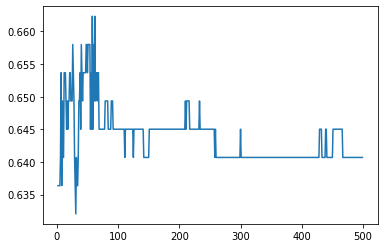

In [ ]:
import matplotlib.pyplot as plt
# n = list(range(2,500))
plt.plot(n, acuracy)
plt.show()

In [ ]:
max(acuracy)

0.6623376623376623

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=14, max_depth=2, random_state=0)

In [ ]:
# bag = bag.fit(X_train, y_train)
clf = clf.fit(training, training_label)

In [ ]:
n = list(range(2,500))
acuracy = []
for i in n:
  clf = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
  clf = clf.fit(training, training_label)
  y_test_pred = clf.predict(test)
  bag_test = accuracy_score(test_label, y_test_pred)
  print(f'acuracy n = {i} = {bag_test}')
  acuracy.append(bag_test)

acuracy n = 2 = 0.6406926406926406
acuracy n = 3 = 0.645021645021645
acuracy n = 4 = 0.6493506493506493
acuracy n = 5 = 0.6406926406926406
acuracy n = 6 = 0.6493506493506493
acuracy n = 7 = 0.6493506493506493
acuracy n = 8 = 0.645021645021645
acuracy n = 9 = 0.6363636363636364
acuracy n = 10 = 0.645021645021645
acuracy n = 11 = 0.6406926406926406
acuracy n = 12 = 0.658008658008658
acuracy n = 13 = 0.6536796536796536
acuracy n = 14 = 0.6666666666666666
acuracy n = 15 = 0.6666666666666666
acuracy n = 16 = 0.658008658008658
acuracy n = 17 = 0.658008658008658
acuracy n = 18 = 0.658008658008658
acuracy n = 19 = 0.658008658008658
acuracy n = 20 = 0.658008658008658
acuracy n = 21 = 0.658008658008658
acuracy n = 22 = 0.6666666666666666
acuracy n = 23 = 0.6666666666666666
acuracy n = 24 = 0.6666666666666666
acuracy n = 25 = 0.6666666666666666
acuracy n = 26 = 0.6666666666666666
acuracy n = 27 = 0.6536796536796536
acuracy n = 28 = 0.6623376623376623
acuracy n = 29 = 0.6536796536796536
acuracy n 

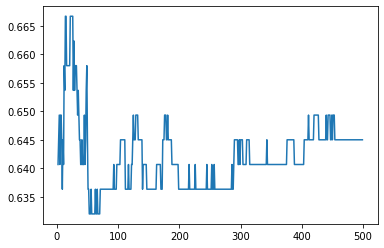

In [ ]:
import matplotlib.pyplot as plt
# n = list(range(2,500))
plt.plot(n, acuracy)
plt.show()

In [ ]:
max(acuracy)
# stacking

0.6666666666666666

# **Retinopathy Diabetic** 